


## Introduction

Cyclistic is a fictional bike-share company based in Chicago. The company offers a range of bicycles for users to rent and ride across the city. The primary goal of the project is to analyze Cyclistic's trip data to understand the behavior of casual riders versus annual members, and to devise strategies for converting casual riders into annual members.

## Steps of analysis
### **1. Ask**

**Business Task**: How do annual members and casual riders use Cyclistic bikes differently?

**Stakeholders**: Cyclistic executive team, marketing analytics team

### **2. Prepare**

**Data collection**:

Download historical trip data from [source](https://divvy-tripdata.s3.amazonaws.com/index.html).

The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).

202306-divvy-tripdata.csv

202307-divvy-tripdata.csv

202308-divvy-tripdata.csv

202309-divvy-tripdata.csv

202310-divvy-tripdata.csv

202311-divvy-tripdata.csv

202312-divvy-tripdata.csv

202401-divvy-tripdata.csv

202402-divvy-tripdata.csv

202403-divvy-tripdata.csv

202404-divvy-tripdata.csv

202305-divvy-tripdata.csv

### **3. Process**

#### **Set up my work environment**
***Install packages and load libraries***

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(stringr)
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)
library(scales)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### **Import dataset**
***Load data files***

In [2]:
May23 <- read_csv("../input/cyclistic-data/202305-divvy-tripdata.csv")
Jun23 <- read_csv("../input/cyclistic-data/202306-divvy-tripdata.csv")
Jul23 <- read_csv("../input/cyclistic-data/202307-divvy-tripdata.csv")
Aug23 <- read_csv("../input/cyclistic-data/202308-divvy-tripdata.csv")
Sep23 <- read_csv("../input/cyclistic-data/202309-divvy-tripdata.csv")
Oct23 <- read_csv("../input/cyclistic-data/202310-divvy-tripdata.csv")
Nov23 <- read_csv("../input/cyclistic-data/202311-divvy-tripdata.csv")
Dec23 <- read_csv("../input/cyclistic-data/202312-divvy-tripdata.csv")
Jan24 <- read_csv("../input/cyclistic-data/202401-divvy-tripdata.csv")
Feb24 <- read_csv("../input/cyclistic-data/202402-divvy-tripdata.csv")
Mar24 <- read_csv("../input/cyclistic-data/202403-divvy-tripdata.csv")
Apr24 <- read_csv("../input/cyclistic-data/202404-divvy-tripdata.csv")


Rows: 604827 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 719618 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 767650 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

***Combine data into one data frame***

In [3]:
all_df <- rbind(May23,Jun23,Jul23,Aug23,Sep23,Oct23,Nov23,Dec23,Jan24,Feb24,Mar24,Apr24)

***Overview the data frame***

In [4]:
colnames(all_df)
skim_without_charts(all_df)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,POSIXct,started_at,0,1.0000000,2023-05-01 00:00:33,2024-04-30 23:59:46,2023-09-01 11:13:33,4836538,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,POSIXct,ended_at,0,1.0000000,2023-05-01 00:04:28,2024-05-02 00:59:33,2023-09-01 11:35:50,4848215,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,ride_id,0,1.0000000,NA,NA,NA,NA,16,16,0,5738612,0,NA,NA,NA,NA,NA,NA,NA
4,character,rideable_type,0,1.0000000,NA,NA,NA,NA,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,885429,0.8457068,NA,NA,NA,NA,10,64,0,1630,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,885429,0.8457068,NA,NA,NA,NA,3,35,0,1584,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,939115,0.8363515,NA,NA,NA,NA,10,64,0,1645,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,939115,0.8363515,NA,NA,NA,NA,3,36,0,1595,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,NA,NA,NA,NA,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values 
Name                       all_df 
Number of rows             5738612
Number of columns          13     
_______________________           
Column type frequency:            
  character                7      
  numeric                  4      
  POSIXct                  2      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5738612          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    885429         0.846  10  64     0     1630          0
4 start_station_id      885429         0.846   3  35     0     1584          0
5 end_station_name      939115         0.836  10  64     0     1645          0
6 end_station_id  

#### **Cleaning the data**

***Check for duplicates in ride_id***


In [5]:
all_df %>%
  group_by(ride_id) %>%
  filter(n()>1)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


There are no duplicates

***Check for missing values***

In [6]:
colSums(is.na(all_df))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            885429             885429             939115             939115 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               7610               7610 
     member_casual 
                 0

There are plenty NA values of station_name, start_station_id, end_station_name, end_station_id. They don't affect for our analysis because our analisys doesn't include location usage. But we save a missing data to a file

***Selecting rows with NA values in any column***

In [7]:
rows_with_na <- all_df[apply(
  all_df, 1, function(x) any(is.na(x))),]

***Create csv file with na data for further investigation***

In [8]:
write_csv(rows_with_na,"rows_with_na.csv")

#### **Calculate ride duration**

For correct calculation of ride_duration "started_at" should be less than "ended_at" so we define a negative ride duration

In [9]:
all_df %>%
  filter(started_at>ended_at) %>%
  count(started_at>ended_at)

started_at > ended_at,n
<lgl>,<int>
TRUE,375


There are 375 incorrect records of data. They are negligible in relation to the total data. They can be ignored


***Calculate ride duration and create new columns to make data more informative***

In [10]:
all_df <- all_df %>%
  mutate(ride_duration_mins = difftime(ended_at,started_at,units = "mins")) %>%
  mutate(month = format(as.Date(all_df$started_at),"%B")) %>%
  mutate(day_of_week = format(as.Date(all_df$started_at),"%A"))

***Clean data from negative ride duration***

In [11]:
all_df_cleaned <- all_df %>%
  filter(ride_duration_mins>0)
glimpse(all_df_cleaned)

Rows: 5,736,996
Columns: 16
$ ride_id            <chr> "0D9FA920C3062031", "92485E5FB5888ACD", "FB144B3FC8…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2023-05-07 19:53:48, 2023-05-06 18:54:08, 2023-05-…
$ ended_at           <dttm> 2023-05-07 19:58:32, 2023-05-06 19:03:35, 2023-05-…
$ start_station_name <chr> "Southport Ave & Belmont Ave", "Southport Ave & Bel…
$ start_station_id   <chr> "13229", "13229", "13162", "13196", "TA1308000047",…
$ end_station_name   <chr> NA, NA, NA, "Damen Ave & Cortland St", "Southport A…
$ end_station_id     <chr> NA, NA, NA, "13133", "13229", "TA1306000029", "1343…
$ start_lat          <dbl> 41.93941, 41.93948, 41.85379, 41.89456, 41.95708, 4…
$ start_lng          <dbl> -87.66383, -87.66385, -87.64672, -87.65345, -87.664…
$ end_lat            <dbl> 41.93000, 41.94000, 41.86000, 41.91598, 41.93948, 4…
$ end_lng            <dbl> -87.65000, -87.69000, -87.65000, -87.67733, -87.663…
$ member_cas

***Save the cleaned data to .csv file***


In [12]:
write_csv(all_df_cleaned,"alltripsdata_clean.csv")

### **4. Analyze**

***Import file with clean data and calculate mean, max, min ride duration***

In [13]:
clean_df <- read_csv("alltripsdata_clean.csv")
summary(clean_df)
clean_df %>%
  summarise(avr_ride_duration = mean(ride_duration_mins), max_ride_duration = max(ride_duration_mins), min_ride_duration = min(ride_duration_mins))

Rows: 5736996 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (5): start_lat, start_lng, end_lat, end_lng, ride_duration_mins
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   ride_id          rideable_type        started_at                 
 Length:5736996     Length:5736996     Min.   :2023-05-01 00:00:33  
 Class :character   Class :character   1st Qu.:2023-07-06 13:52:52  
 Mode  :character   Mode  :character   Median :2023-09-01 11:02:03  
                                       Mean   :2023-09-23 12:09:48  
                                       3rd Qu.:2023-11-16 17:12:36  
                                       Max.   :2024-04-30 23:59:46  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-05-01 00:04:28   Length:5736996     Length:5736996    
 1st Qu.:2023-07-06 14:16:09   Class :character   Class :character  
 Median :2023-09-01 11:25:50   Mode  :character   Mode  :character  
 Mean   :2023-09-23 12:28:12                                        
 3rd Qu.:2023-11-16 17:25:34                                        
 Max.   :2024-05-02 00:59:33      

avr_ride_duration,max_ride_duration,min_ride_duration
<dbl>,<dbl>,<dbl>
18.38835,98489.07,0.01666667


***Calculate average, max and min duration by users***

In [14]:
users_summary <- clean_df %>%
  group_by(member_casual) %>%
  summarise(avr_ride_duration=mean(ride_duration_mins),max_ride_duration = max(ride_duration_mins), min_ride_duration = min(ride_duration_mins),rides=n(),rides_percent=round((n()/nrow(clean_df)*100),digits = 2))

In [15]:
View(users_summary)

member_casual,avr_ride_duration,max_ride_duration,min_ride_duration,rides,rides_percent
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
casual,28.28440,98489.07,0.01666667,2051987,35.77
member,12.87777,1559.80,0.01666667,3685009,64.23


Rename column "member_casual" for more accessible

In [16]:
users_summary <- users_summary %>%
  rename("users"="member_casual")

***Create some visualizations to compare usage patterns between casual riders and annual members***

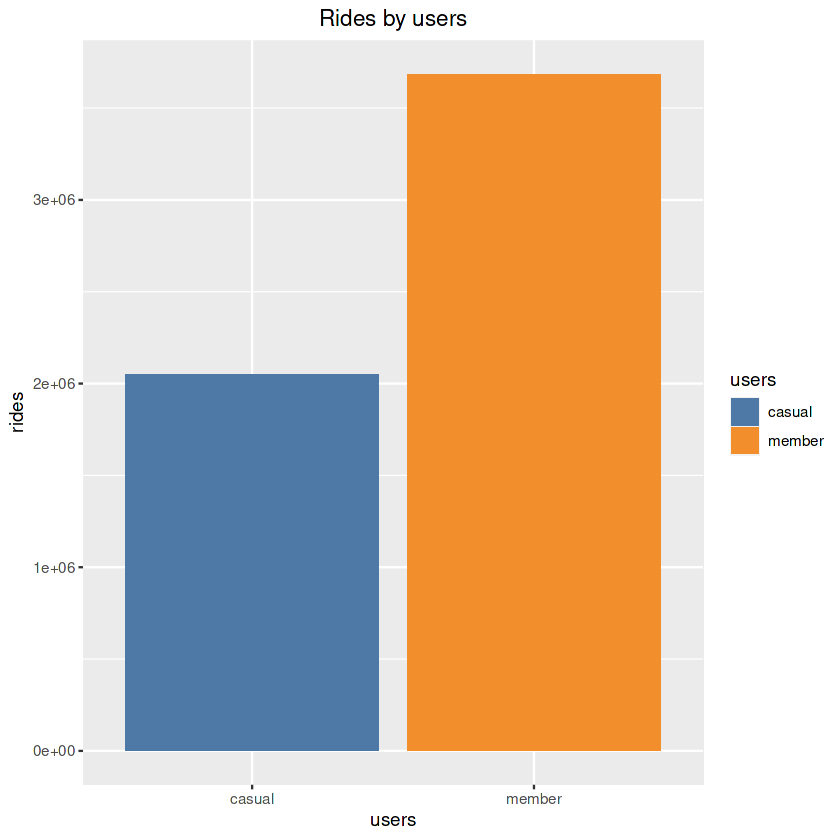

In [17]:
users_summary %>%
  ggplot(aes(x=users,y=rides,fill = users))+
  geom_col()+
  scale_fill_manual(values = c("casual"="#4E79A7","member"="#F28E2B"))+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(title = "Rides by users")

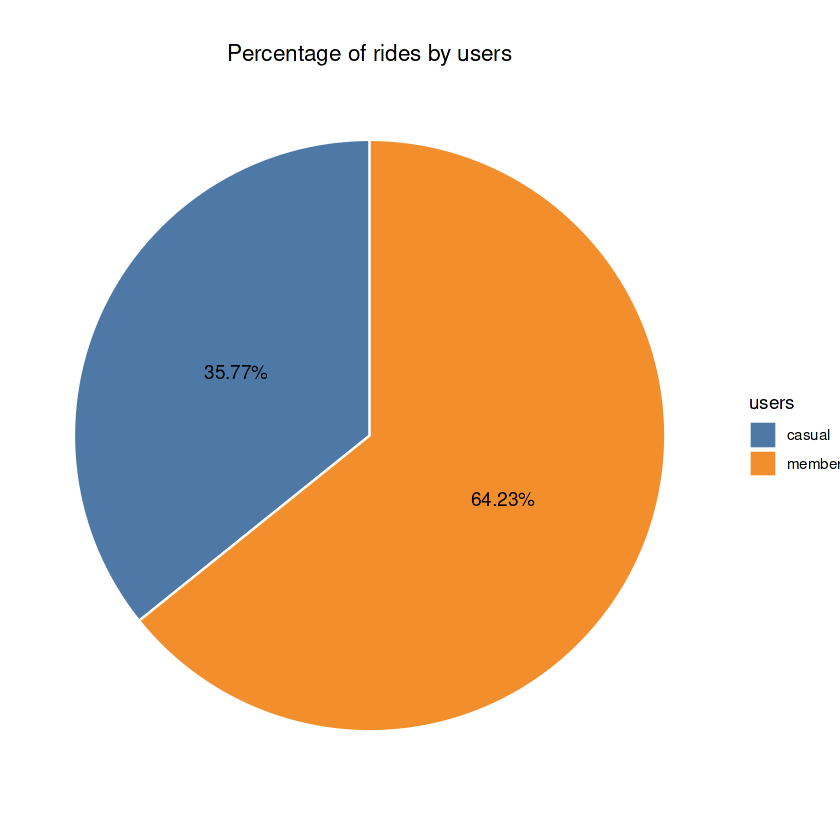

In [18]:
ggplot(users_summary, aes(x="",y=rides_percent, fill = users))+
  geom_bar(stat = "identity", color = "white") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(rides_percent, "%")),
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  scale_fill_manual(values = c("casual"="#4E79A7","member"="#F28E2B"))+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(title = "Percentage of rides by users")

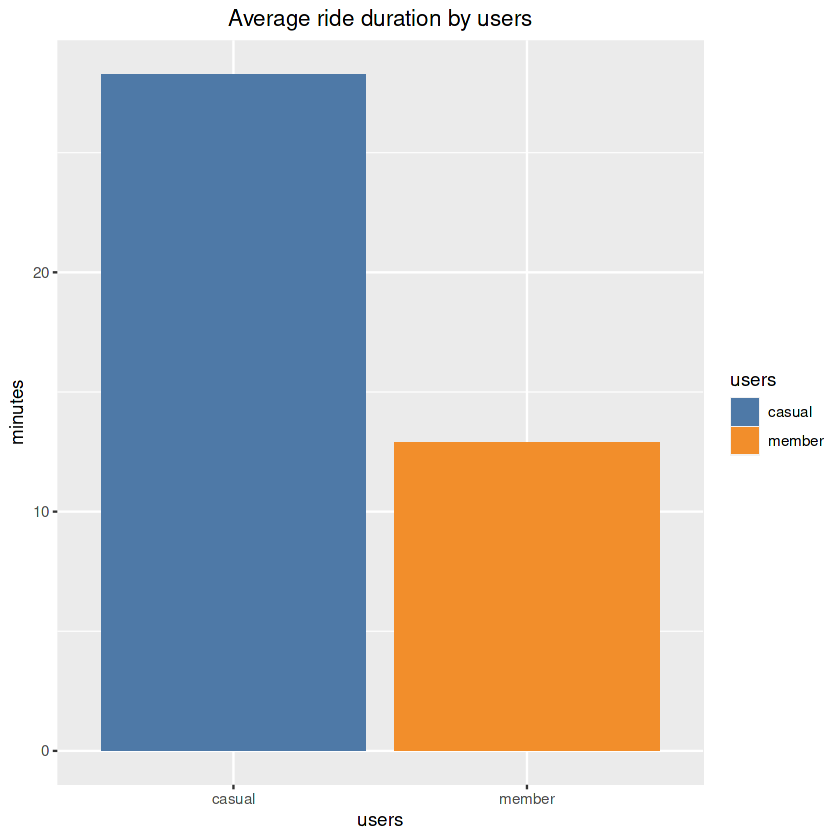

In [19]:
users_summary %>%
  ggplot(aes(x=users,y=avr_ride_duration,fill = users))+
  geom_col()+
  scale_fill_manual(values = c("casual"="#4E79A7","member"="#F28E2B"))+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(title = "Average ride duration by users", y="minutes")

***Other part of comparative analysis was conducted in Tableau***

### **5. Share**

***Download library(magick) for reading images***

In [20]:
library(magick)

Linking to ImageMagick 6.9.10.23
Enabled features: fontconfig, freetype, fftw, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg

Using 4 threads



***load and display images***

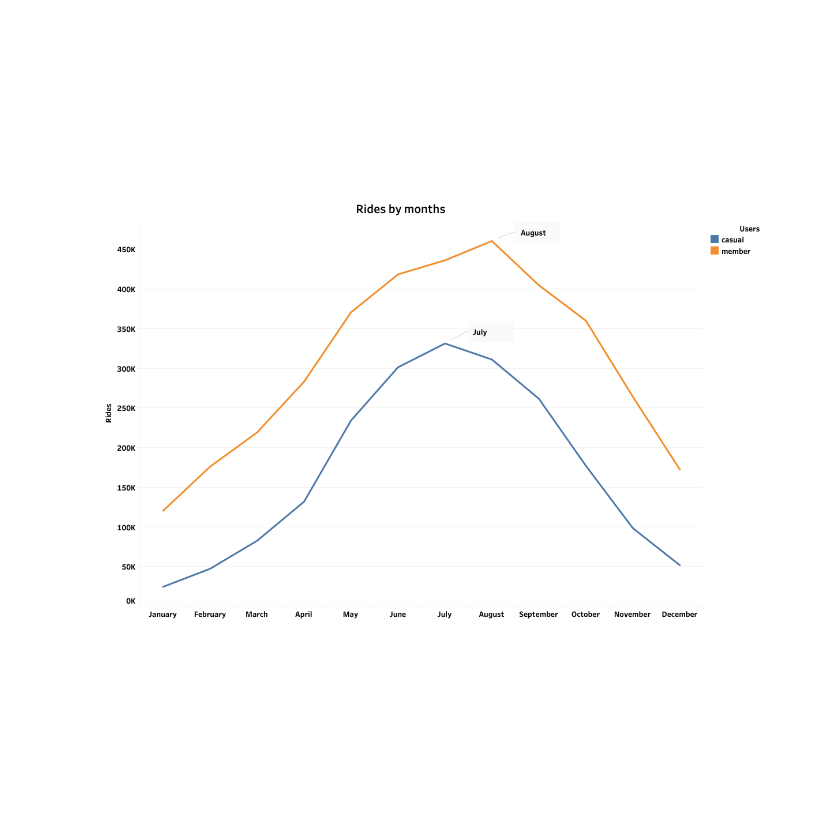

In [21]:
img1 <- image_read("/kaggle/input/visualization/Rides by months.png")
plot(img1)

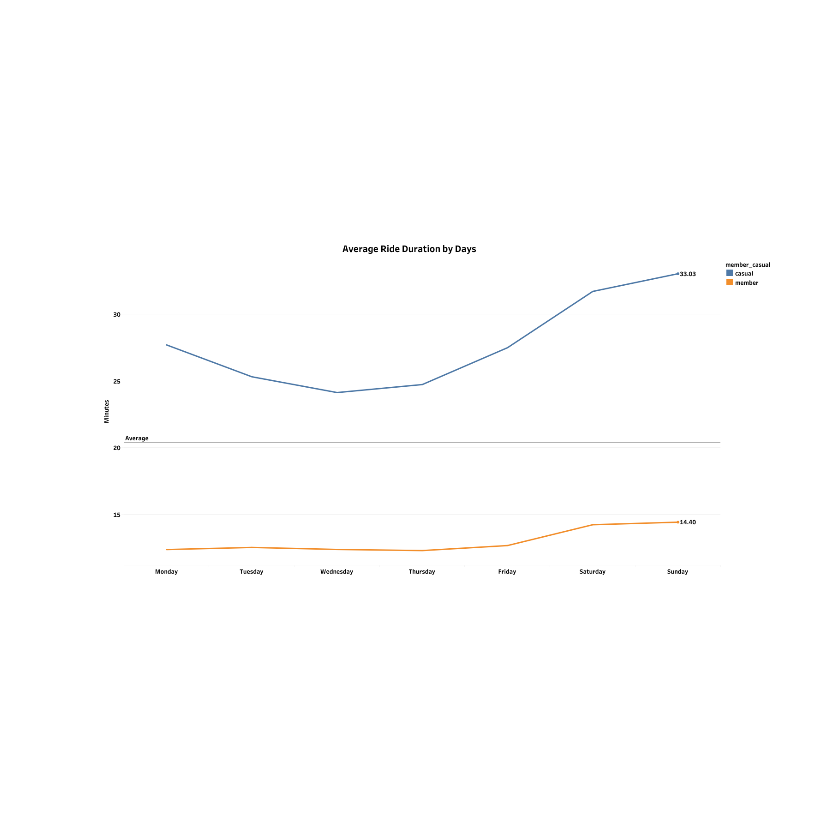

In [22]:
img2 <- image_read("/kaggle/input/visualization/Average Ride Duration by Days.png")
plot(img2)

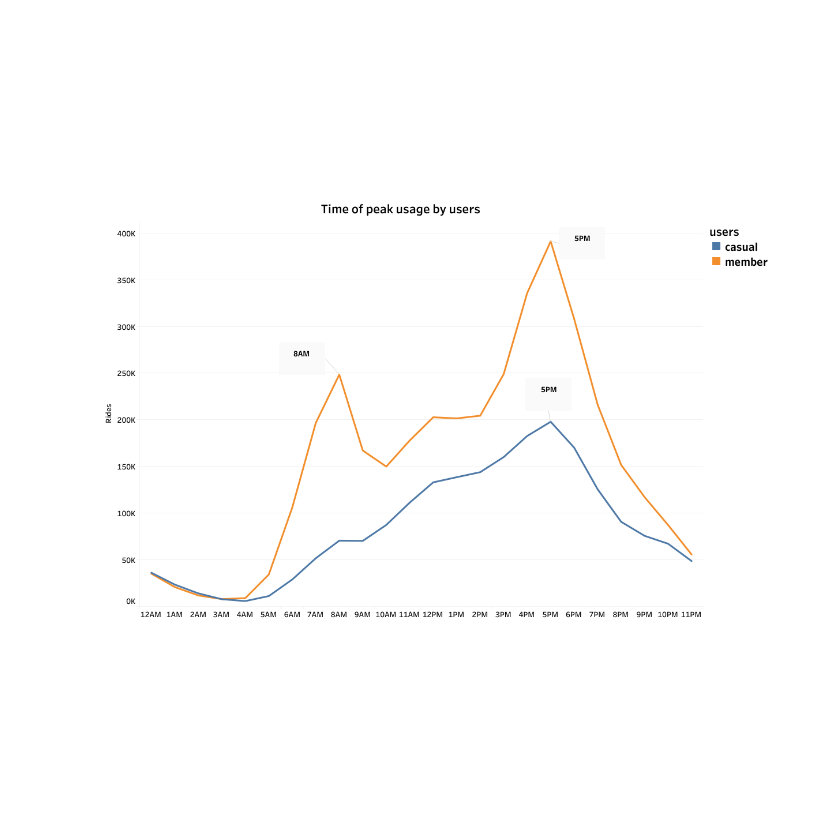

In [23]:
img3 <- image_read("/kaggle/input/visualization/Time of peak usage.png")
plot(img3)

### **6.Act**

Findings and recommendations are represented in a [presentation](https://www.kaggle.com/datasets/olhatarasovets/presentation)